# エイムズ市の住宅価格

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。


住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。


エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。


Ames, Iowa - Wikipedia

# KaggleのNotebooks

Kaggleでは「Notebooks」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。


これ以降Kaggleを利用していきますので、アカウントを作成してください。


《参考Notebooks》


Comprehensive data exploration with Python | Kaggle（まずはここから）


House Prices : EDA to ML (Beginner) | Kaggle


A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle

# データセットの準備

データセットはKaggleからダウンロードします。


House Prices: Advanced Regression Techniques | Kaggle


上記URLを開き、Dataのページへ移動してください。

この中のtrain.csvを使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。

## 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

このアイオワ州エイムズ市の住宅価格データセットはDean De Cockによってデータサイエンス教育のために集計された。特徴量としては何階建てか、ベッドルームの数など79種類あり、住宅価格が目的変数となっている。

## 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [36]:
#各特徴量がどういったものかを見る。（数値データか文字データなど）
#今回の目的変数はどの列か確認する。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

特徴量は1-79列目の79個で、データ型の内訳はfloat64が3個, int64が33個, objectが43個。
目的変数SalePriceは80列目に格納されており、データ型はint64。

In [50]:
#特徴量の平均値と標準偏差、四分位数を一度に表示させる。
pd.get_option("display.max_columns")
X = df.drop(['Id', 'SalePrice'], axis=1)
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


SalePrice, LotAreaの標準偏差の値が非常に大きい値になっているが、これらは値のスケールが大きい特徴量であるため。

## 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

- 各特徴量の欠損値の有無を確認する。
- 欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

ResidentMario/missingno: Missing data visualization module for Python.

- 欠損値が何パーセント含まれるかを確認する。
- 5つ以上欠損値がある特徴量（列）は削除する。
- 欠損値があるサンプル（行）は削除する。

In [55]:
#各特徴量の欠損値の有無を確認する

X.isnull().sum()[df.isnull().sum()>0].sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

欠損値を含む特徴量のうち、欠損値が少ない順から並べたもの

In [6]:
import missingno as msno

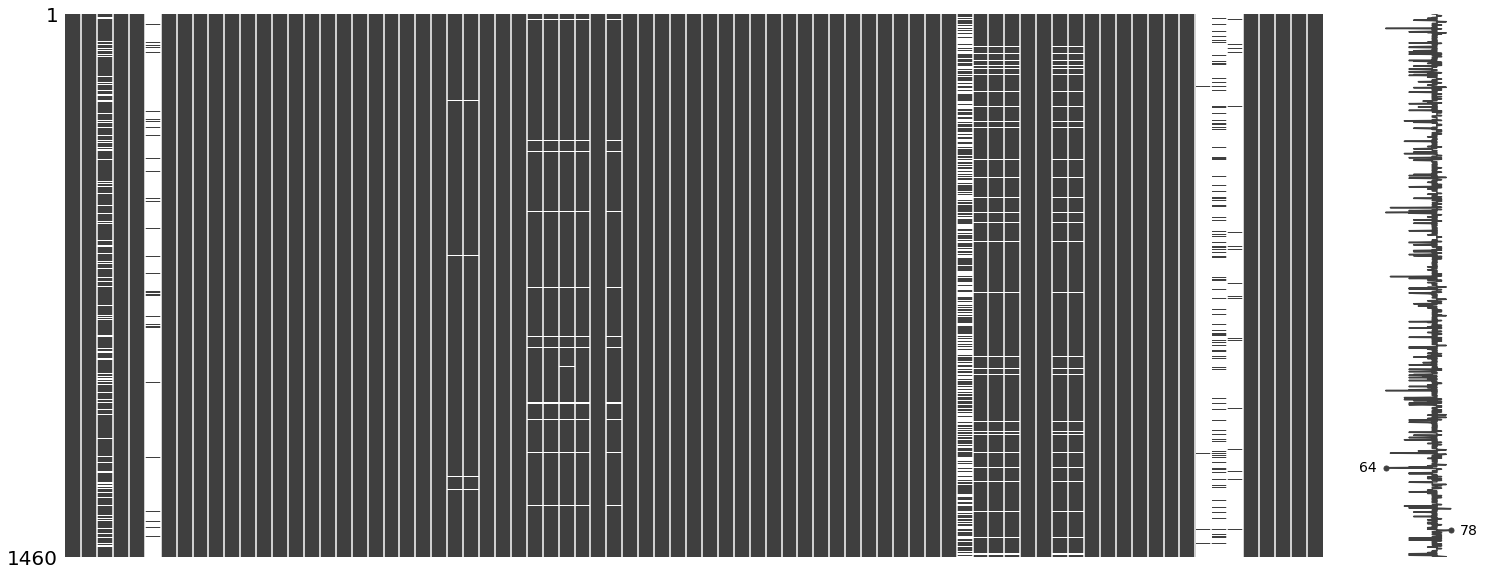

In [51]:
msno.matrix(X)

欠損値がデータ全体のどこに分布しているのががわかる図。
欠損値を持つ列はいずれも、欠損値が列全体に散らばっていることが分かる。
全ての行が64-78個の非欠損値を持っている。

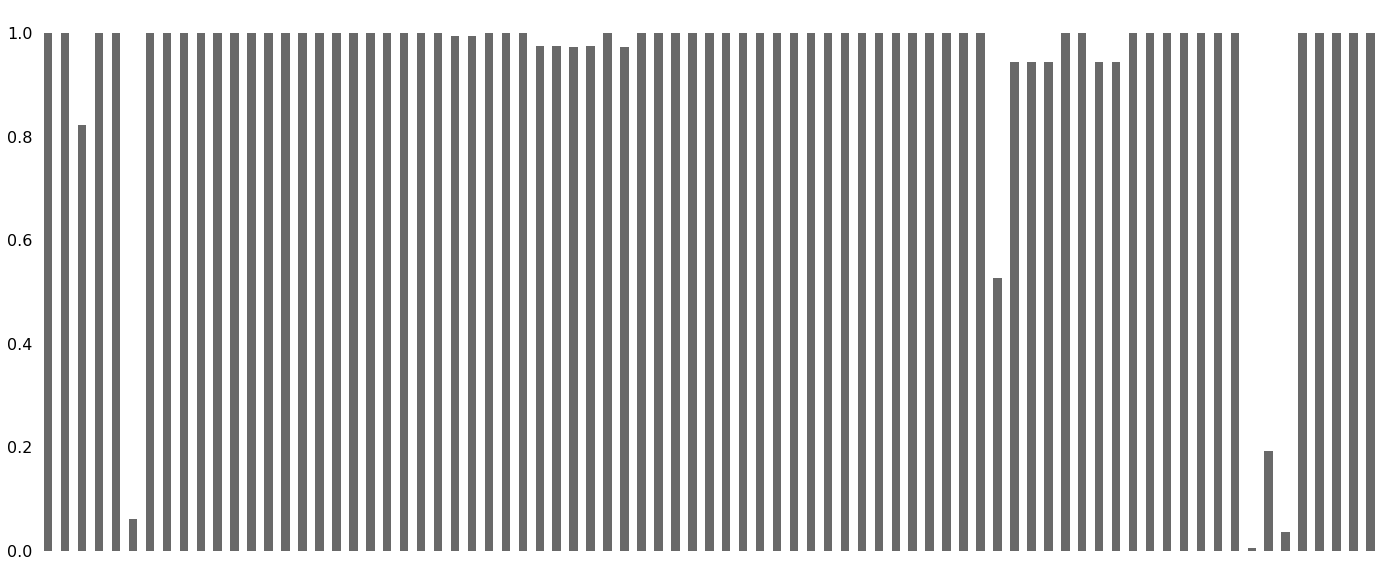

In [52]:
msno.bar(X)

各特徴量でどれくらい欠損値があるのかがわかる。

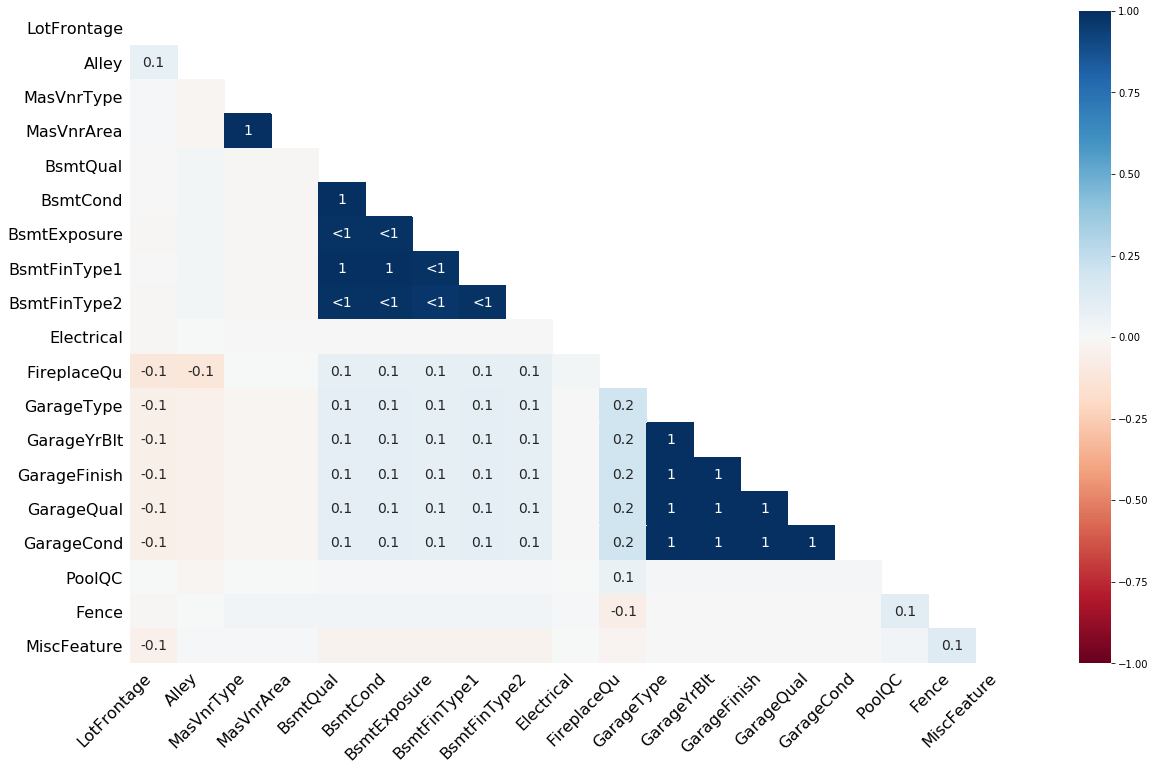

In [53]:
msno.heatmap(X)

欠損値における特徴量間の相関度を表したヒートマップ。
相関係数が高い値を示した特徴量は同じカテゴリー同士のもの(ガレージ、地下室、化粧張煉瓦など)であることが分かる。

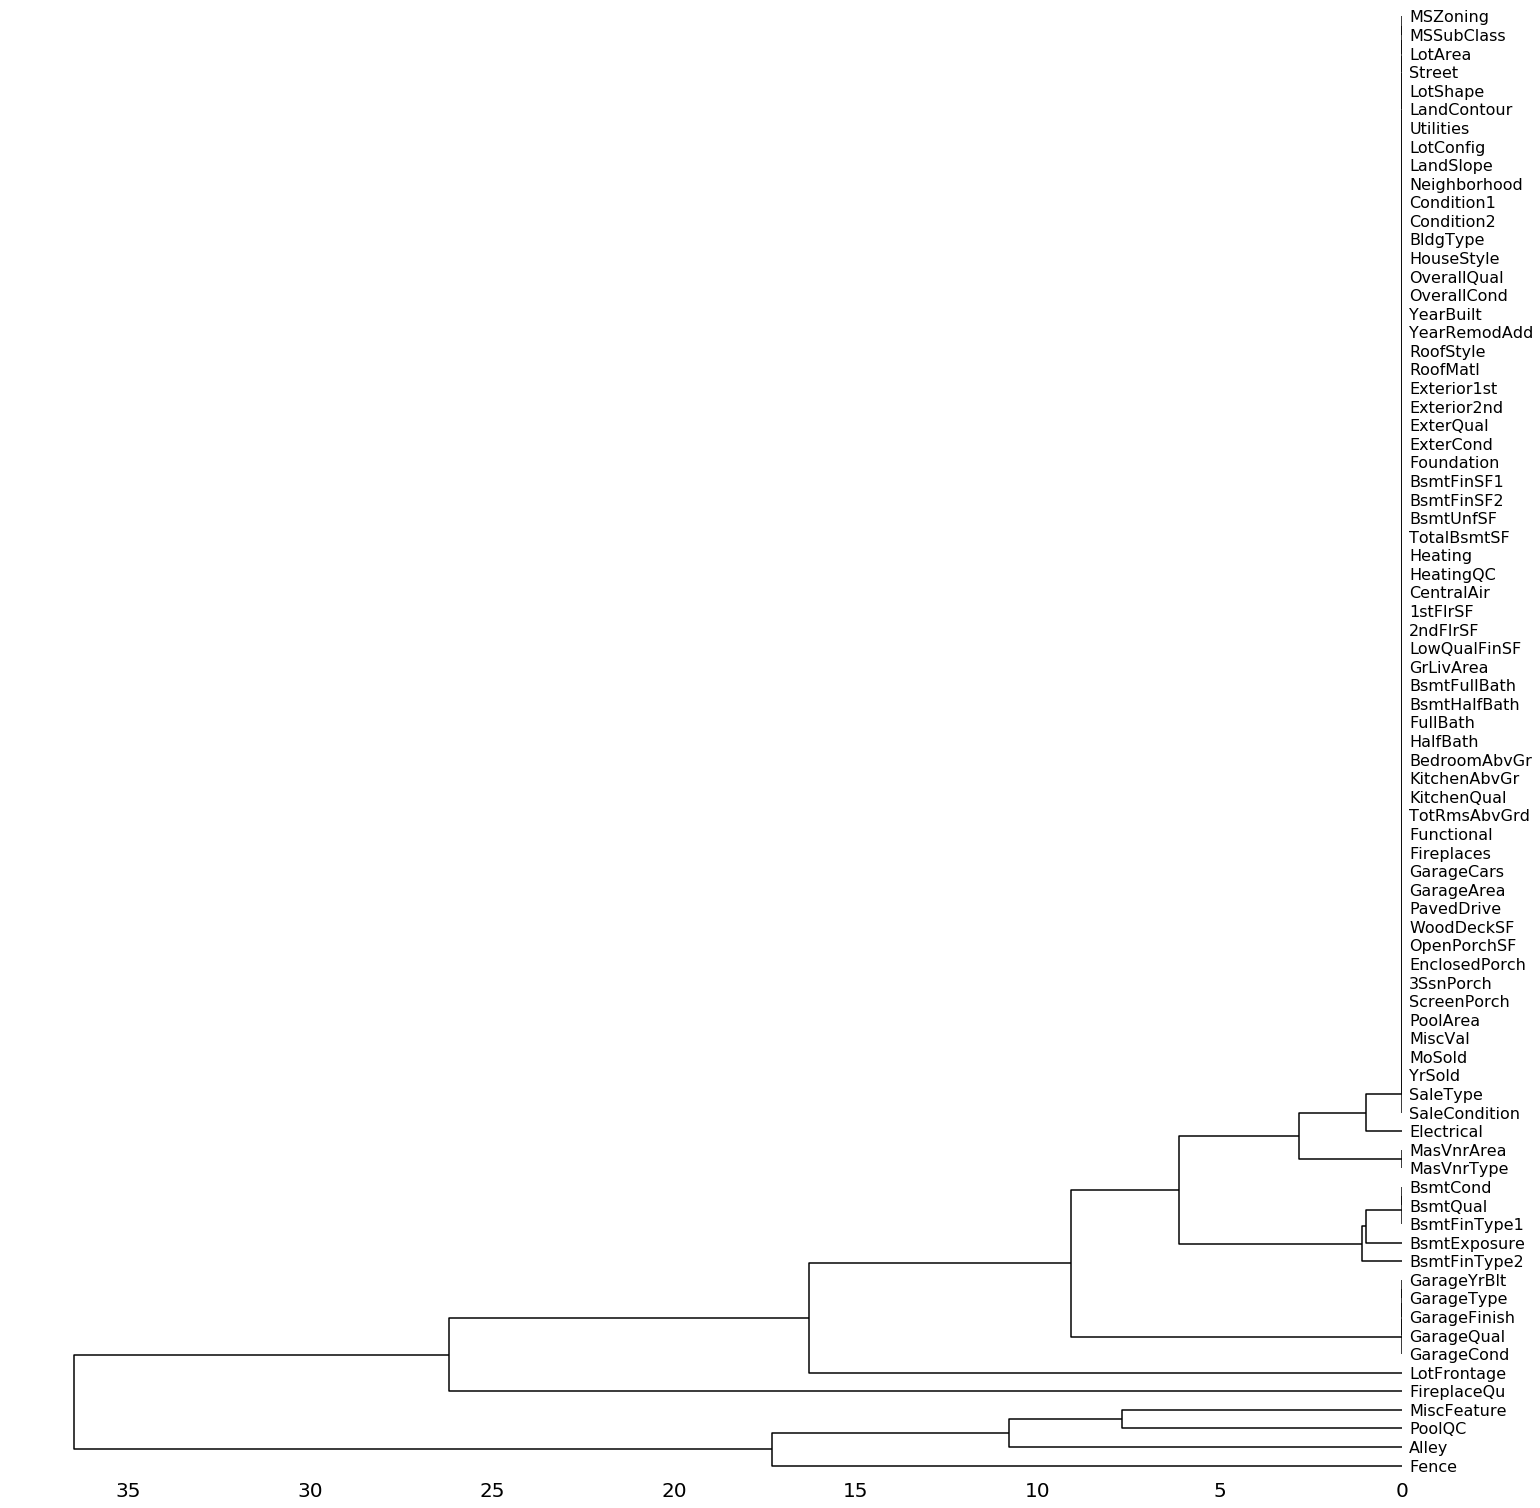

In [54]:
msno.dendrogram(X)

欠損値の分布で特徴量をまとめたもの

In [56]:
#欠損値が何パーセント含まれるかを確認する。

total = X.isnull().sum()[X.isnull().sum()>0].sort_values()
missing_df = pd.DataFrame(total, columns=['total'])
missing_df['missing_ratio'] = total / len(df)
missing_df

,total,missing_ratio
Electrical,1,0.000685
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtFinType1,37,0.025342
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
GarageCond,81,0.055479
GarageQual,81,0.055479


In [57]:
#5つ以上欠損値がある特徴量（列）は削除する。

missing_feature = missing_df[missing_df['total']>=5]
missing_feature_list = list(missing_feature.index)
missing_feature_list

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtExposure',
 'BsmtFinType2',
 'GarageCond',
 'GarageQual',
 'GarageFinish',
 'GarageType',
 'GarageYrBlt',
 'LotFrontage',
 'FireplaceQu',
 'Fence',
 'Alley',
 'MiscFeature',
 'PoolQC']

In [72]:
df_v2 = df.drop(missing_feature_list, axis=1).dropna(how='any', axis=0)
df_v2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,...,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,...,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,...,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,...,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,...,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,...,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,...,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,...,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,...,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [73]:
#欠損値があるサンプル（行）は削除する。
X_v2 = df_v2.drop(['Id', 'SalePrice'], axis=1)
X_v2

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,...,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,...,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,...,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,...,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,...,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,...,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,...,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,...,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,...,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal


1460rows×79columnsだった特徴量のデータは最終的に1459rows×61columnsまで減った。

# 目的変数

次は目的変数がどのような分布を持っているか確認していきます。

## 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

- 尖度
- 歪度

### 歪度（わいど）
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のことです。サンプルサイズを$n$、各データ$x_i(i: 1,2,..,n)$の平均値を$\overline{x}$、標準偏差を$s$とすると歪度は次の式から求められます。

$$
\frac{n}{(n-1)(n-2)}\sum_{i=1}^{n}(\frac{x_i-\overline{x}}{s})^3 \quad
$$

「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとります。左右対称の分布（例えば正規分布）の場合には0になります。

### 尖度（せんど）
分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示します。サンプルサイズを$n$、各データ$x_i(i: 1,2,..,n)$の平均値を、標準偏差を$s$とすると尖度は次の式から求められます。

$$
\frac{n(n+1)}{(n-1)(n-2)(n-3)}\sum_{i=1}^{n}(\frac{x_i-\overline{x}}{s})^4-\frac{3(n-1)^2}{(n-2)(n-3)} \quad
$$

正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値をとります。正規分布の場合には0になります。

## 【問題6】分布の確認
seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
- 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。


seaborn.distplot — seaborn 0.9.0 documentation

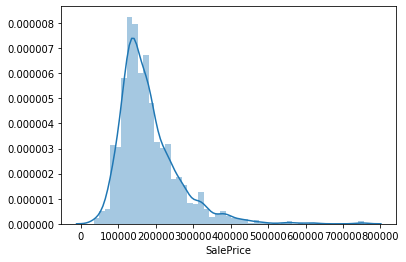

In [80]:
import seaborn as sns
y_v2 = df_v2['SalePrice']
sns.distplot(y_v2)

In [83]:
#歪度
y_v2.skew()

1.8819429948035529

In [84]:
#尖度
y_v2.kurt()

6.529263049673958

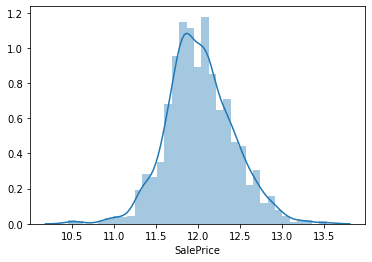

In [85]:
import numpy as np

y_v2_log = np.log(df_v2['SalePrice'])
sns.distplot(y_v2_log)

In [86]:
y_v2_log.skew()

0.12131775882415026

In [87]:
y_v2_log.kurt()

0.806927847502148

対数変換前は歪度が1.88、尖度が6.53とと大きく左に偏り、尖った分布だったが、対数変換後は歪度0.12、尖度0.81とより正規分布に近い分布になった。

## 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。


相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

《補足》


重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

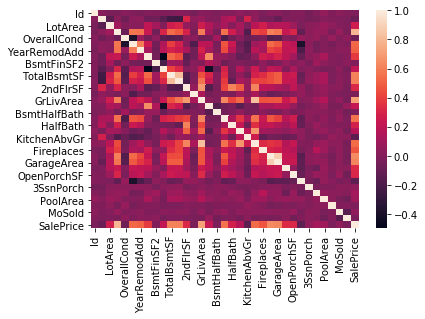

In [129]:
#データ全体に対して相関係数のヒートマップを作製

sns.heatmap(df_v2.corr())

In [139]:
#目的変数との相関の高い特徴量10個を表示

cor_sp = df_v2.corr()['SalePrice'] 
cor_sp2 = cor_sp.abs().sort_values()[-11: -1]
cor_sp2

YearRemodAdd    0.507430
YearBuilt       0.523273
TotRmsAbvGrd    0.533779
FullBath        0.560881
1stFlrSF        0.605968
TotalBsmtSF     0.613905
GarageArea      0.623423
GarageCars      0.640473
GrLivArea       0.708618
OverallQual     0.791069
Name: SalePrice, dtype: float64

目的変数との相関が高い順に

- OverallQual: Overall material and finish quality　総合的な資材、仕上げの質
- GrLivArea: Above grade (ground) living area square feet　地上階のリビングの平方フィート
- GarageCars: Size of garage in car capacity　ガレージの駐車台数
- GarageArea: Size of garage in square feet　ガレージの平方フィート
- TotalBsmtSF: Total square feet of basement area　地下室の総面積の平方フィート
- 1stFlrSF: First Floor square feet　1階床面積の平方フィート
- FullBath: Full bathrooms above grade　地上階の浴室数
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)　地上階の総部屋数（浴室以外）
- YearBuilt: Original construction date　建設日
- YearRemodAdd: Remodel date　改装日

住宅価格に影響する特徴量として大きく3つのカテゴリー、総仕上げの質、建物の規模に関わるもの、年数があげられることが分かる。

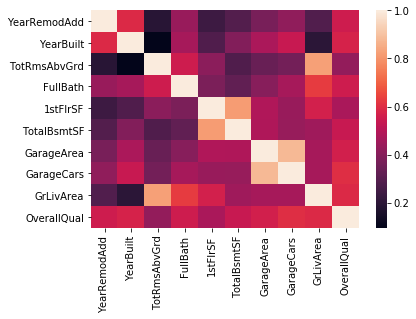

In [141]:
#目的変数との相関の高い特徴量10個の相関係数行列ヒートマップ

sns.heatmap(df_v2[cor_sp2.index].corr())

In [146]:
#10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す

cor_sp3 = df_v2[cor_sp2.index].corr().unstack() #unstack()で行から列にピボット
cor_sp4 = cor_sp3[cor_sp3 != 1.0] #値が1のものを削除
cor_sp4.abs().sort_values() #絶対値をとり、ソート

TotRmsAbvGrd  YearBuilt       0.095401
YearBuilt     TotRmsAbvGrd    0.095401
YearRemodAdd  TotRmsAbvGrd    0.191603
TotRmsAbvGrd  YearRemodAdd    0.191603
GrLivArea     YearBuilt       0.199286
                                ...   
1stFlrSF      TotalBsmtSF     0.819393
GrLivArea     TotRmsAbvGrd    0.825576
TotRmsAbvGrd  GrLivArea       0.825576
GarageCars    GarageArea      0.882613
GarageArea    GarageCars      0.882613
Length: 90, dtype: float64

お互いの相関係数が高い組み合わせは
- GarageArea, GarageCars　　駐車台数が増えると自ずとガレージの面積は広くなる。
- TotRmsAbvGrd, GrLivArea 　総部屋数が多いほど家も大きくなり、リビングも広くなる。
- 1stFlrSF, TotalBsmtSF 　　1階床面積が広いほど地下室の面積も広くなる。
